<a href="https://colab.research.google.com/github/IagoLSJ/TCC/blob/main/TCC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Instalar as bibliotécas**

In [ ]:
pip install pandas sktime pmdarima numpy statsmodels matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.9/28.9 MB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 35.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.1/134.1 kB 6.1 MB/s eta 0:00:00


**Importar as bibliotecas**

In [ ]:
import pandas as pd
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error
from sktime.forecasting.base import ForecastingHorizon
from sktime.datatypes import check_raise
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
from sktime.datasets import load_airline
from sktime.forecasting.arima import ARIMA

warnings.filterwarnings("ignore")

**Importar os dados e criando a data frame**


In [ ]:
#Lendo o arquivo
dados = pd.read_csv('/content/sample_data/DADOS_TCC_UFC_QUIXADA.csv')

#Removendo dados que não serão usados
dados = dados.drop(columns=['Unidade', 'Tx. Retenção (Prazo Padrão)', 'Tx. Retenção II (Prazo Máximo)', 'Matriculas'])

#Renomeando a coluna Taxa de Evasão para taxa_evasao
dados.rename(columns={'Taxa de Evasão': 'taxa_evasao', 'Semestre': 'semestre'}, inplace=True)

In [ ]:
dados

,taxa_evasao,semestre
0,7.3%,2018.1
1,9.0%,2017.2
2,7.0%,2017.1
3,8.6%,2016.2
4,7.6%,2016.1
5,14.3%,2015.2
6,9.5%,2015.1
7,11.2%,2014.2
8,14.4%,2014.1
9,14.5%,2013.2


**Criar a função que vai converter o valor do semestre e datatime**
Os dados da coluna semestre chegam como objeto a função converte pra string da um split no . e convferte os valores pra inteiro e cria uma data usando a função Timestemp

In [ ]:
def parseToTimestamp(value):
    value = str(value)

    year, semester = value.split('.')

    year = int(year)

    month = 1 if int(semester) == 1 else 7

    return pd.Timestamp(year=year, month=month, day=1)

In [ ]:
dados['semestre'] = dados['semestre'].apply(parseToTimestamp)

In [ ]:
#Converter os dados de Object para float
dados['taxa_evasao'] = dados['taxa_evasao'].str.replace('%', '').astype(float) / 100

In [ ]:
#Definir da coluna data como index
dados.set_index('semestre', inplace=True)
dados.sort_index(inplace=True)

# Ajustando os valores da coluna taxa de evasaõ para floatdf['taxa_evasao'] = df['taxa_evasao'].str.rstrip('%').astype(float) / 100


KeyError: "None of ['semestre'] are in the columns"

In [ ]:
if isinstance(dados, pd.DataFrame) and dados.shape[1] == 1:
    y = dados.squeeze()  # Converter para pd.Series
  # Garantir que a série é do tipo numérico
    y = pd.to_numeric(y, errors='coerce')  # Coerce irá converter valores não numéricos para NaN

    # Verificar o formato com a função check_raise do sktime
    try:
        check_raise(y, mtype="pd.Series")
        print("Os dados estão no formato correto para sktime.")
    except Exception as e:
        print(f"Erro de formato: {e}")

Os dados estão no formato correto para sktime.


In [ ]:
dados

,taxa_evasao
semestre,
2013-01-01,0.122
2013-07-01,0.145
2014-01-01,0.144
2014-07-01,0.112
2015-01-01,0.095
2015-07-01,0.143
2016-01-01,0.076
2016-07-01,0.086
2017-01-01,0.070


In [ ]:
y = dados['taxa_evasao']

In [ ]:
y.index = pd.PeriodIndex(dados.index, freq='6M')

In [ ]:
fh = [1,2,3]

In [ ]:
forceaster = ARIMA()

In [ ]:
forceaster.fit(y, fh=fh)

ARIMA()

In [ ]:
y_pred = forceaster.predict()

In [ ]:
y_pred_int = forceaster.predict_interval(coverage=0.9)
y_pred_int

taxa_evasao          
                0.9          
              lower     upper
2023-01    0.058968  0.146808
2023-07    0.055982  0.144850
2024-01    0.055591  0.144483

In [ ]:
from sktime.registry import all_estimators

all_estimators(
    "forecaster", filter_tags={"capability:pred_int": True}, as_dataframe=True
)

,name,object
0,ARCH,<class 'sktime.forecasting.arch._uarch.ARCH'>
1,ARIMA,<class 'sktime.forecasting.arima._pmdarima.ARI...
2,AutoARIMA,<class 'sktime.forecasting.arima._pmdarima.Aut...
3,AutoETS,<class 'sktime.forecasting.ets.AutoETS'>
4,BATS,<class 'sktime.forecasting.bats.BATS'>
5,BaggingForecaster,<class 'sktime.forecasting.compose._bagging.Ba...
6,ColumnEnsembleForecaster,<class 'sktime.forecasting.compose._column_ens...
7,ConformalIntervals,<class 'sktime.forecasting.conformal.Conformal...
8,DartsLinearRegressionModel,<class 'sktime.forecasting.darts.DartsLinearRe...
9,DartsXGBModel,<class 'sktime.forecasting.darts.DartsXGBModel'>


In [ ]:
import numpy as np

from sktime.datasets import load_airline
from sktime.forecasting.theta import ThetaForecaster

# until fit, identical with the simple workflow
y = dados['taxa_evasao']

fh = np.arange(1, 13)

forecaster = ThetaForecaster(sp=6)
y.index = pd.PeriodIndex(dados.index, freq='6M')
forecaster.fit(y)

y_pred = forecaster.predict(fh)
y_pred

2023-01    0.074813
2023-07    0.084672
2024-01    0.086352
2024-07    0.113149
2025-01    0.077595
2025-07    0.093008
2026-01    0.068714
2026-07    0.077675
2027-01    0.079117
2027-07    0.103533
2028-01    0.070906
2028-07    0.084874
Freq: 6M, Name: taxa_evasao, dtype: float64

In [ ]:
coverage = 0.9
y_pred_ints = forecaster.predict_interval(coverage=coverage)
y_pred_ints

taxa_evasao          
                0.9          
              lower     upper
2023-01    0.033949  0.115677
2023-07    0.040204  0.129140
2024-01    0.038552  0.134153
2024-07    0.062233  0.164065
2025-01    0.023744  0.131446
2025-07    0.036374  0.149643
2026-01    0.009427  0.128002
2026-07    0.015848  0.139502
2027-01    0.014851  0.143382
2027-07    0.036918  0.170149
2028-01    0.002021  0.139791
2028-07    0.013792  0.155956

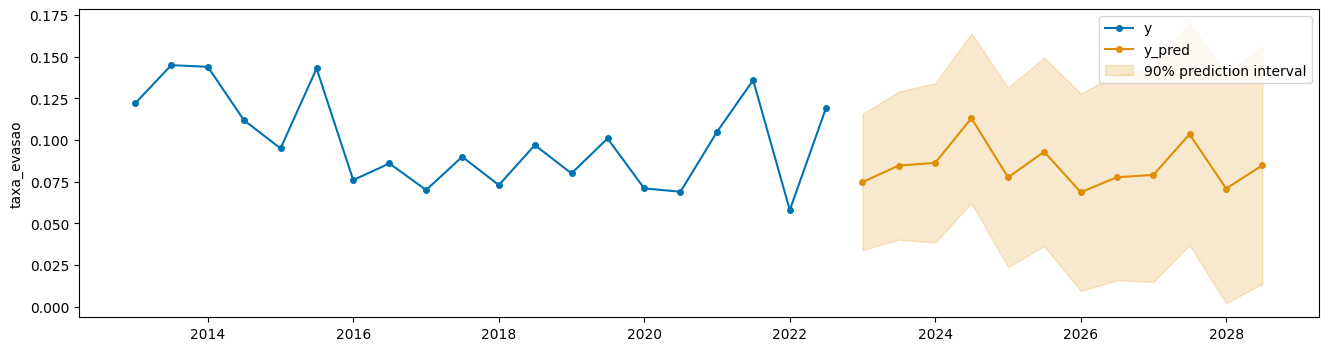

In [ ]:
from sktime.utils import plotting

# also requires predictions
y_pred = forecaster.predict()

fig, ax = plotting.plot_series(
    y, y_pred, labels=["y", "y_pred"], pred_interval=y_pred_ints
)

ax.legend();

In [ ]:
coverage = [0.5, 0.9, 0.95]
y_pred_ints = forecaster.predict_interval(coverage=coverage)
y_pred_ints

taxa_evasao                                                  
               0.50                0.90                0.95          
              lower     upper     lower     upper     lower     upper
2027-01     0.04945  0.099747  0.013271  0.135926  0.001522  0.147675

In [ ]:
alpha = [0.1, 0.25, 0.5, 0.75, 0.9]
y_pred_quantiles = forecaster.predict_quantiles(alpha=alpha)
y_pred_quantiles

taxa_evasao                                       
               0.10     0.25      0.50      0.75      0.90
2027-01    0.026816  0.04945  0.074598  0.099747  0.122381

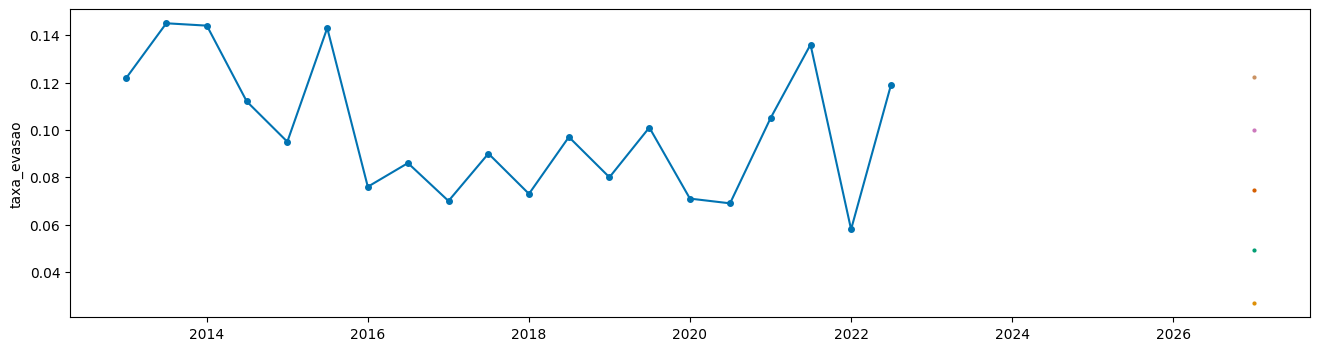

In [ ]:
from sktime.utils import plotting

columns = [y_pred_quantiles[i] for i in y_pred_quantiles.columns]
fig, ax = plotting.plot_series(y[-50:], *columns)